# Assignment 1

Complete the code snippets in a colab notebook. 
Download the notebook file and submit in Blackboard.

## Exercise 1

Complete the code below to plot the intrinsic payoff of a European call option with strike 100
for a the value of the underlying varying from 0 to 200 in steps of size 1.
In the same figure, using Black-Scholes formula with the inputs provided, plot the value of the option for the varying underlying value.

In a second figure, plot the intrinsic payoff and the values function of a European put option with strike 100 with the same parameters.

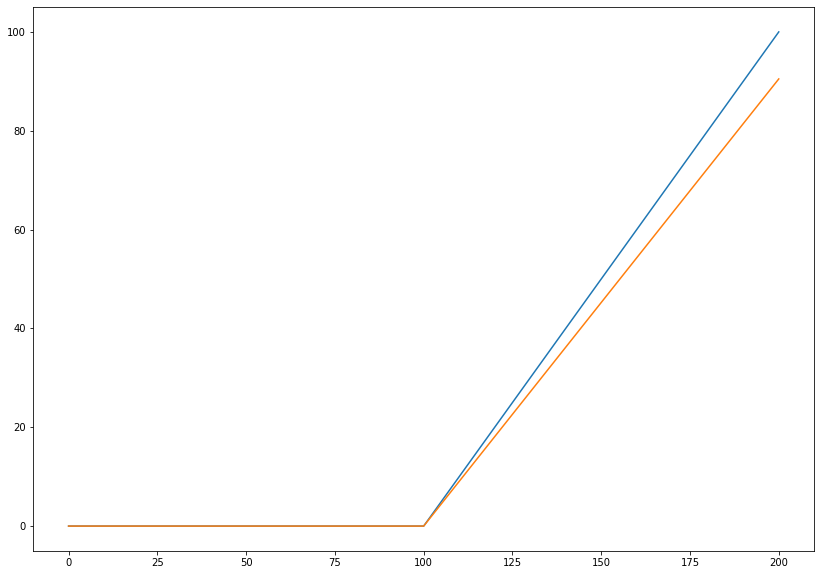

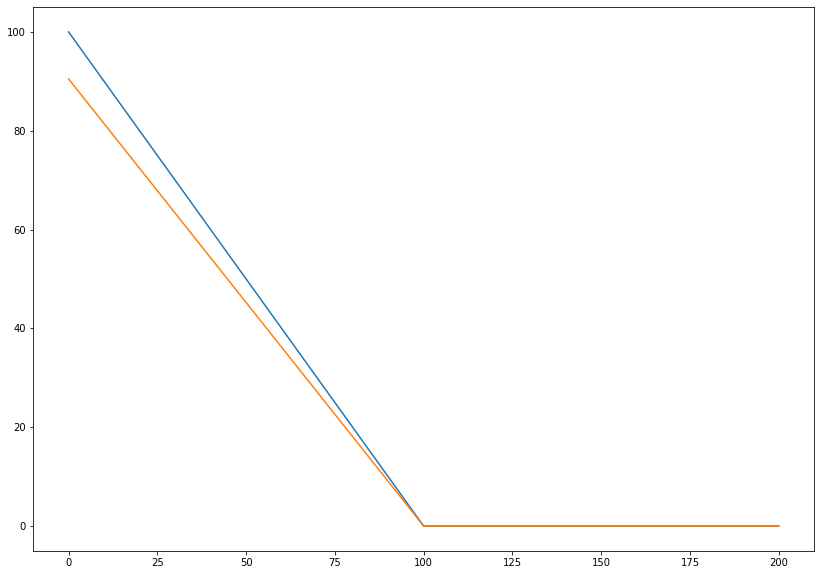

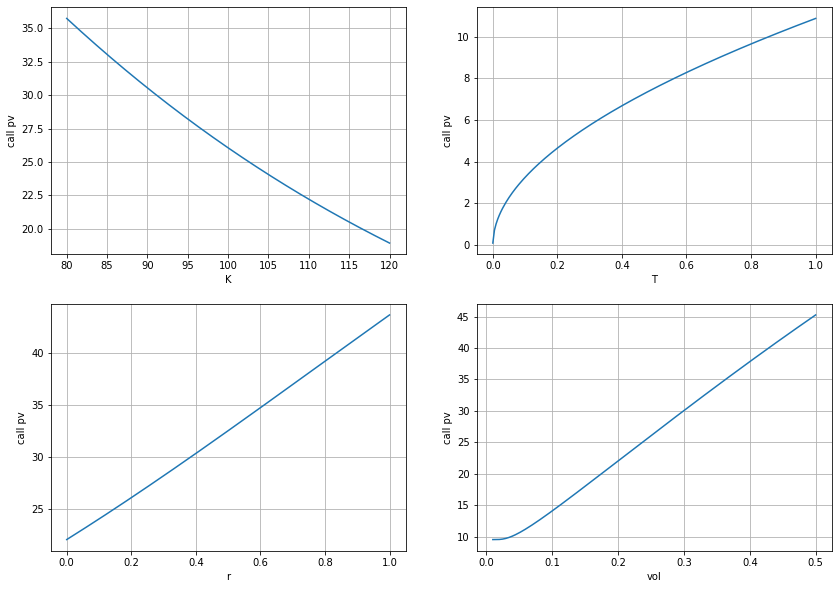

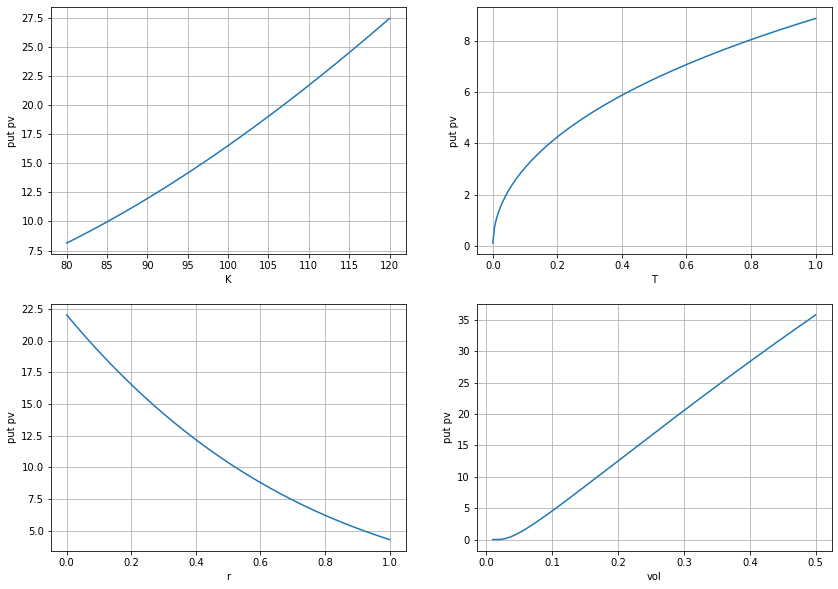

In [24]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_call_value(S, K, T, r, vol):
    '''Computes BSM European call option value'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    call = S * stats.norm.cdf(d1) - K * np.exp(-r*T) * stats.norm.cdf(d2)
     
    return call

def bs_put_value(S, K, T, r, vol):
    '''Computes BSM European put option value'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    put = K * np.exp(-r*T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    
    return put

#### Uncomment the line below and change the code to create the grid values of the underlying to use in your plots
S = np.linspace(0, 200, 201)


#### Uncomment the line below and complete the code
call_payoffs = np.maximum(S - K, 0)
call_values = math.exp(-r*T) * call_payoffs

#### Uncomment the line below and complete the code
put_payoffs = np.maximum(K - S, 0)
put_values = math.exp(-r*T) * put_payoffs

## Plot call payoff and value functions
## Uncomment the plotting lines and complete
plt.figure()
plt.plot(call_payoffs)
plt.plot(call_values)
plt.show()


## Plot put payoff and value functions
## Uncomment the plotting lines and complete
plt.figure()
plt.plot(put_payoffs)
plt.plot(put_values)
plt.show()


#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_function(function, option_type):
    points = 200
    S = 100
    K = 100
    T = 5
    r = 0.02
    vol = 0.25

    fig,ax = plt.subplots(2,2)

    # C(K) plot
    klist = np.linspace(80, 120, points)
    vlist = [function(S, K, T, r, vol) for K in klist]
    ax[0,0].plot(klist, vlist)
    ax[0,0].grid(True)
    ax[0,0].set_xlabel('K')
    ax[0,0].set_ylabel(option_type+' pv')

    # C(T) plot
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(S, K, T, r, vol) for T in tlist]
    ax[0,1].plot(tlist, vlist)
    ax[0,1].grid(True)
    ax[0,1].set_xlabel('T')
    ax[0,1].set_ylabel(option_type+' pv')

    # C(r) plot
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(S, K, T, r, vol) for r in rlist]
    ax[1,0].plot(tlist, vlist)
    ax[1,0].grid(True)
    ax[1,0].set_xlabel('r')
    ax[1,0].set_ylabel(option_type+' pv')    

    # C(sigma) plot
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(S, K, T, r, vol) for vol in slist]
    ax[1,1].plot(slist, vlist)
    ax[1,1].grid(True)
    ax[1,1].set_xlabel('vol')
    ax[1,1].set_ylabel(option_type+' pv')    


plot_function(bs_call_value, 'call')
plot_function(bs_put_value, 'put')

## Exercise 2

Implement the Black-Scholes-Merton greek formulas below.

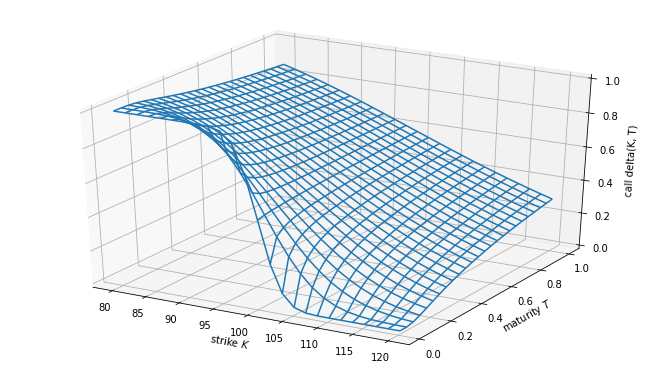

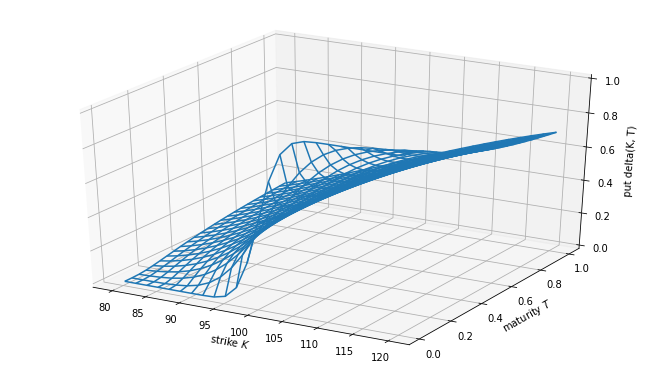

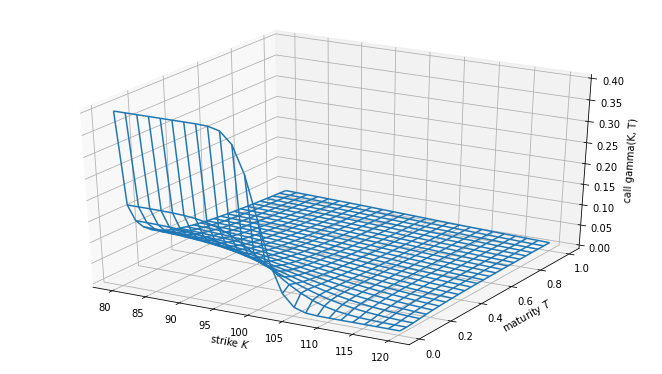

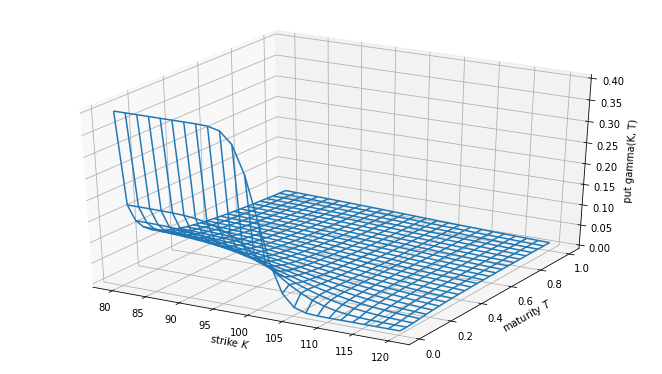

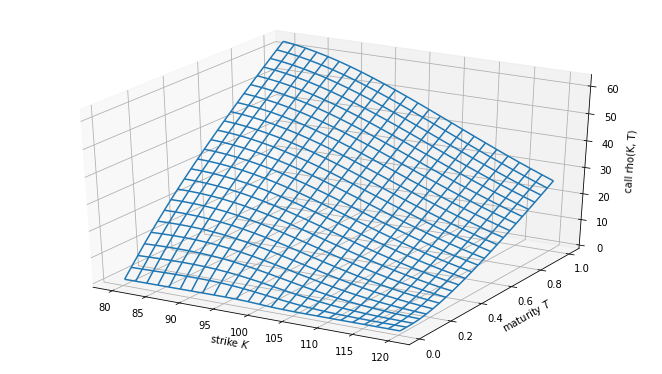

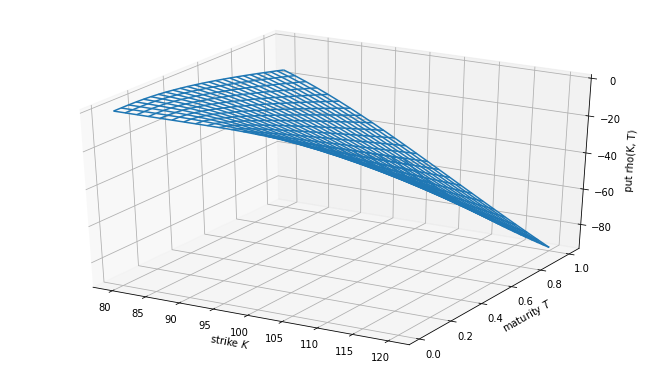

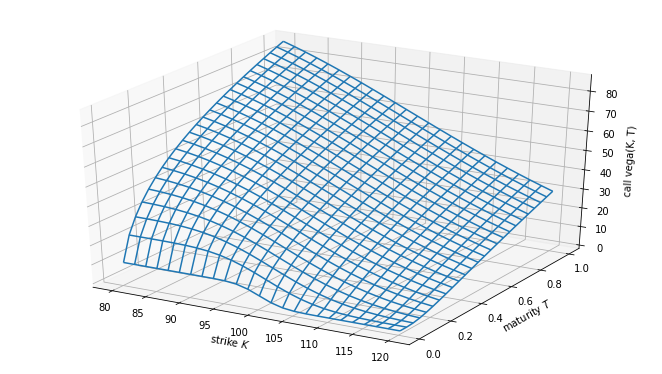

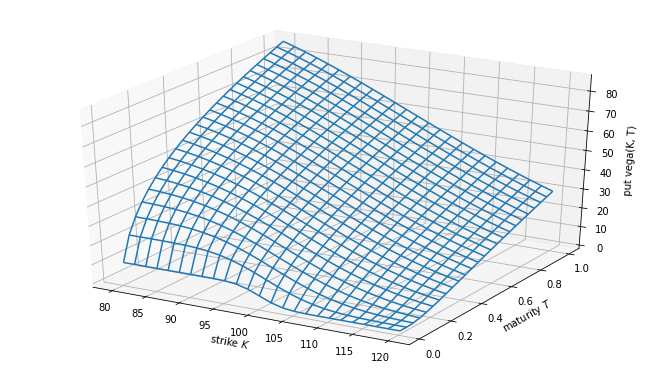

In [26]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import stats

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_call_delta(S, K, T, r, vol):
    '''Computes BSM European call option delta'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    delta_c = stats.norm.cdf(d1)

    return delta_c

def bs_call_gamma(S, K, T, r, vol):
    '''Computes BSM European call option gamma'''

    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    gamma_c = stats.norm.cdf(d1) / (S * vol * np.sqrt(T))
  
    return gamma_c

def bs_call_theta(S, K, T, r, vol):
    '''Computes BSM European call option theta'''
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    theta_c = ((-stats.norm.cdf(d1) * S * vol) / (2 * np.sqrt(T))) - ( r * K *np.exp(-r*T) * stats.norm.cdf(d2))
    
    return theta_c

def bs_call_rho(S, K, T, r, vol):
    '''Computes BSM European call option rho'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    rho_c = K * T * np.exp(-r*T) * stats.norm.cdf(d2)
    
    return rho_c

def bs_call_vega(S, K, T, r, vol):
    '''Computes BSM European call option vega'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    vega_c =  S * np.sqrt(T) * stats.norm.cdf(d1)
    
    return vega_c


def bs_put_delta(S, K, T, r, vol):
    '''Computes BSM European put option delta'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    delta_p = stats.norm.cdf(-d1)
    
    return delta_p

def bs_put_gamma(S, K, T, r, vol):
    '''Computes BSM European put option gamma'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    gamma_p = stats.norm.cdf(d1) / (S * vol * np.sqrt(T))
  
    return gamma_p

def bs_put_theta(S, K, T, r, vol):
    '''Computes BSM European put option theta'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    theta_p = ((-stats.norm.cdf(d1) * S * vol) / (2 * np.sqrt(T))) + (r * K * np.exp(-r*T) * stats.norm.cdf(-d2))
    
    return theta_c

def bs_put_rho(S, K, T, r, vol):
    '''Computes BSM European put option rho'''
     
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    rho_p =  -K * T * np.exp(-r*T) * stats.norm.cdf(-d2)
    
    return rho_p

def bs_put_vega(S, K, T, r, vol):
    '''Computes BSM European put option vega'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol * np.sqrt(T))
    vega_p =  S * np.sqrt(T) * stats.norm.cdf(d1)
    
    return vega_p
    
    pass


#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_greeks(function, greek):
    
    S = 100
    r = 0.02
    vol = 0.25
    
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(S, klist[j], tlist[i], r, vol)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

plot_greeks(bs_call_delta, 'call delta')
plot_greeks(bs_put_delta, 'put delta')

plot_greeks(bs_call_gamma, 'call gamma')
plot_greeks(bs_put_gamma, 'put gamma')

plot_greeks(bs_call_rho, 'call rho')
plot_greeks(bs_put_rho, 'put rho')

plot_greeks(bs_call_vega, 'call vega')
plot_greeks(bs_put_vega, 'put vega')
